<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch_lightning torchinfo --quiet

     |████████████████████████████████| 708 kB 14.7 MB/s 
     |████████████████████████████████| 529 kB 54.0 MB/s 


In [2]:
!git clone https://github.com/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/

%cd Time-Series-Anomaly-Detection-An-experimental-survey

%mkdir dataset
!gdown https://drive.google.com/uc?id=1ZCLBU_pKTbsPlcj_LwxZE3IRy6mrlys3 -O="./dataset/MSL.zip"
import zipfile
with zipfile.ZipFile("./dataset/MSL.zip", 'r') as zip_ref:
    zip_ref.extractall("./dataset/")

Cloning into 'Time-Series-Anomaly-Detection-An-experimental-survey'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 356 (delta 146), reused 211 (delta 121), pack-reused 93
Receiving objects: 100% (356/356), 2.44 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (158/158), done.
/content/Time-Series-Anomaly-Detection-An-experimental-survey
Downloading...
From: https://drive.google.com/uc?id=1ZCLBU_pKTbsPlcj_LwxZE3IRy6mrlys3
To: /content/Time-Series-Anomaly-Detection-An-experimental-survey/dataset/MSL.zip
100% 767k/767k [00:00<00:00, 125MB/s]


In [3]:
from AnomalyDetectionMethodClass import ADMethod
data_path = './NAB/realKnownCause/ambient_temperature_system_failure.csv'
settings = {
    'MODEL':'LSTM',
    'IN_FEAT':1,
    'EMSIZE': 32,
    'NHID':32,
    'NLAYERS':2,
    'RES_CONNECTION': False,
    'LR': 0.0002,
    'WEIGHT_DECAY':1e-4,
    'CLIP':10,
    'EPOCHS':400,
    'BATCH_SIZE': 32,
    'SEQ_LEN': 50,
    'teacher_forcing_ratio':0.7,
    'DROPOUT': 0.2,
    'TIED': False,
    'LOG_INTERVAL': 10, 


}
method = ADMethod('LSTM',settings, data_path)

method.prepare_pipeline()
method.train()
# method.test()
# method.results()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


| epoch   0 |    10/  144 batches | loss  0.53 
| epoch   0 |    20/  144 batches | loss  0.41 
| epoch   0 |    30/  144 batches | loss  0.33 
| epoch   0 |    40/  144 batches | loss  0.23 
| epoch   0 |    50/  144 batches | loss  0.15 
| epoch   0 |    60/  144 batches | loss  0.11 
| epoch   0 |    70/  144 batches | loss  0.10 
| epoch   0 |    80/  144 batches | loss  0.10 
| epoch   0 |    90/  144 batches | loss  0.09 
| epoch   0 |   100/  144 batches | loss  0.09 
| epoch   0 |   110/  144 batches | loss  0.09 
| epoch   0 |   120/  144 batches | loss  0.09 
| epoch   0 |   130/  144 batches | loss  0.09 
| epoch   0 |   140/  144 batches | loss  0.09 
| epoch   0 |   150/  144 batches | loss  0.09 
| epoch   0 |   160/  144 batches | loss  0.09 
| epoch   0 |   170/  144 batches | loss  0.09 
| epoch   0 |   180/  144 batches | loss  0.09 
| epoch   0 |   190/  144 batches | loss  0.08 
| epoch   0 |   200/  144 batches | loss  0.08 
| epoch   0 |   210/  144 batches | loss

RuntimeError: ignored

In [ ]:
###  TRANSFORMER
from AnomalyDetectionMethodClass import ADMethod
data_path = './dataset/MSL'
settings = {
    'lr':1e-4,
    'num_epochs':3,
    'k':3,
    'win_size':100,
    'input_c':55,
    'output_c':55,
    'batch_size':256,
    'pretrained_model':None,
    'dataset':'MSL',
    'mode':'train', # choices=['train', 'test']
    'data_path':'./dataset/MSL',
    'model_save_path':'checkpoints',
    'anormly_ratio':1
}
method = ADMethod('transformer',settings, data_path)

method.prepare_pipeline()
method.train()
method.test()
method.results()

In [ ]:
### DEEPANT
from AnomalyDetectionMethodClass import ADMethod
data_path = './NAB/realKnownCause/ambient_temperature_system_failure.csv'
settings = {
  'SEQ_LEN': 10,
  'out_dim': 1,
  'EPOCHS': 50
}
method = ADMethod('DeepAnt',settings, data_path)

method.prepare_pipeline()
l = method.train()
p, lp = method.test()
# method.results()

In [36]:
import seaborn as sns
def plot_predictions(preds, threshold, bins = 80):
    sns.displot(preds, bins = bins, kde = True, height = 8, aspect = 2)
    plt.axvline(x = threshold, color = 'r', linestyle = '--', label = 'Chosen Threshold')
    plt.title('Loss Distribution')
    plt.legend()

def loss_plot(preds, threshold):
    fig = plt.figure(figsize=(15,8))
    plt.plot(preds, label = 'Loss')
    # preds.plot(figsize = (15,8), title = 'Chosen Threshold', label = 'Loss')
    plt.axhline(y = threshold, color = 'r', linestyle = '--', label = 'Chosen Threshold')
    plt.legend()
    plt.show()

def ts_plot(df, preds, threshold, alg = 'DeepAnT', range = None):
    idx = preds.loc[lambda x: x > threshold].index
    plt.figure(figsize = (20,8))
    if range is not None:
        min, max = range
        df = df[min:max]
    plt.plot(df, label = '_nolegend_')
    plt.scatter(idx, df.loc[idx], color = 'red', label = 'Detected Anomalies by DeepAnt')
    plt.title('Detected Anomalies in Time Series')
    plt.legend()
    plt.show();

In [45]:
import sklearn
import numpy as np
sc = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
losses = sc.fit_transform(np.array(lp).reshape(-1, 1))

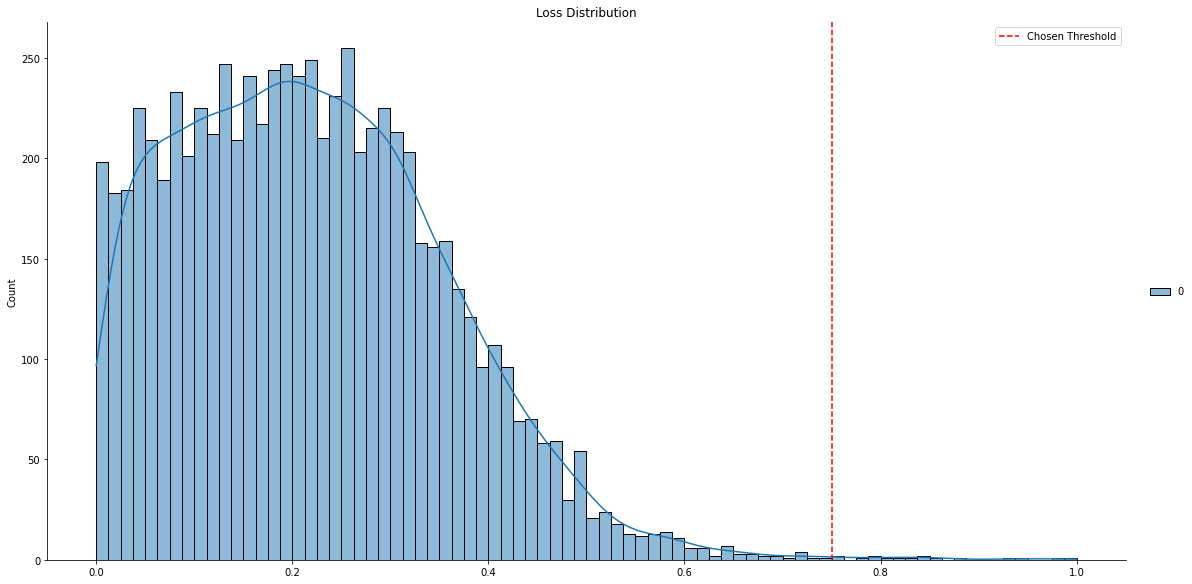

In [52]:
plot_predictions(losses, 0.75)

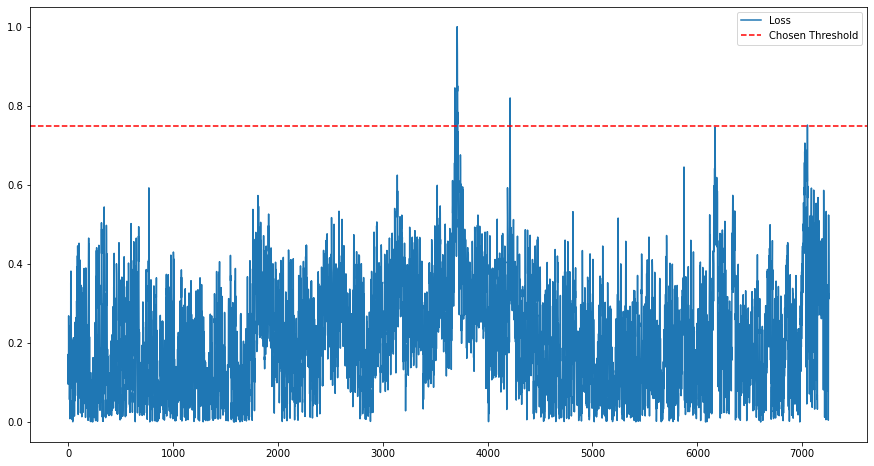

In [50]:
loss_plot(losses, 0.75)

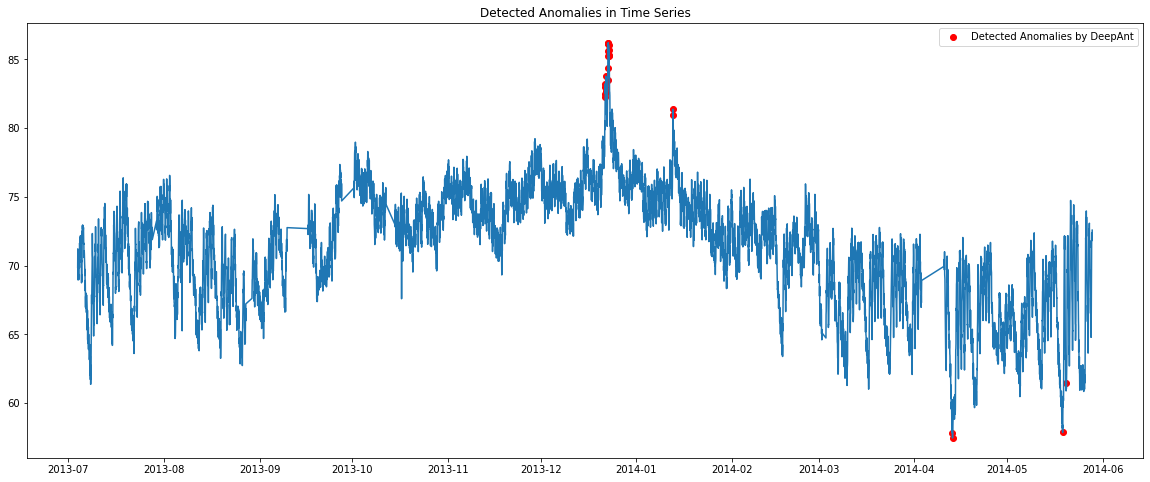

In [62]:
import pandas as pd
df = pd.read_csv(data_path, index_col = 'timestamp', parse_dates=['timestamp'])
target_idx = method.solver.dataset.timestamp
preds_losses = pd.Series(losses.reshape((-1)), index = target_idx)
ts_plot(df, preds_losses, 0.70)